# House Rent Prediction

In [1]:
import pandas as pd

In [10]:
df = pd.read_csv(r"C:\Users\SANJAY\Downloads\csv\x_y1.csv")

In [11]:
df.head()

,Age,BHK,SeaView,BoundarSize,Rent
0,10.0,2,1.0,109,50000
1,5.0,1,NaN,200,34600
2,20.0,5,0.0,260,40000
3,12.0,2,1.0,290,52000
4,NaN,3,1.0,180,30000


### Handling Null Value 

<AxesSubplot:>

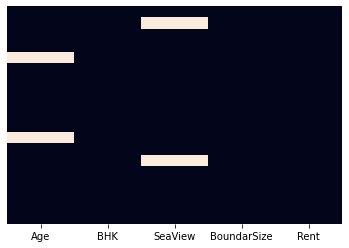

In [13]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [14]:
df.shape

(19, 5)

In [15]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [18]:
df['SeaView']=df['SeaView'].fillna(df['SeaView'].mode())

In [19]:
df.head()

,Age,BHK,SeaView,BoundarSize,Rent
0,10.000000,2,1.0,109,50000
1,5.000000,1,1.0,200,34600
2,20.000000,5,0.0,260,40000
3,12.000000,2,1.0,290,52000
4,11.294118,3,1.0,180,30000


<AxesSubplot:>

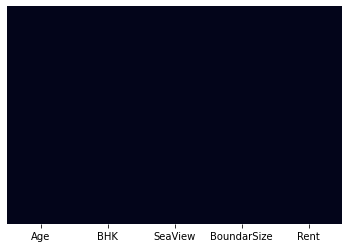

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [21]:
df.isnull().sum()

Age            0
BHK            0
SeaView        0
BoundarSize    0
Rent           0
dtype: int64

### Correlation

In [22]:
corr_matrix = df.corr()
corr_matrix['Rent'].sort_values(ascending=False)

Rent           1.000000
BHK            0.585585
SeaView        0.320032
BoundarSize    0.197769
Age           -0.478127
Name: Rent, dtype: float64

### Divided dependent and Independent Attributes

In [50]:
x=df.iloc[:,0:4].values
x

array([[ 10.        ,   2.        ,   1.        , 109.        ],
       [  5.        ,   1.        ,   1.        , 200.        ],
       [ 20.        ,   5.        ,   0.        , 260.        ],
       [ 12.        ,   2.        ,   1.        , 290.        ],
       [ 11.29411765,   3.        ,   1.        , 180.        ],
       [  7.        ,   5.        ,   0.        , 490.        ],
       [  8.        ,   4.        ,   1.        , 320.        ],
       [ 13.        ,   5.        ,   0.        , 238.        ],
       [  2.        ,  10.        ,   1.        , 341.        ],
       [ 16.        ,   2.        ,   0.        , 167.        ],
       [ 30.        ,   4.        ,   0.        , 540.        ],
       [ 11.29411765,   3.        ,   1.        , 300.        ],
       [ 24.        ,   6.        ,   0.        , 700.        ],
       [  2.        ,   4.        ,   1.        , 300.        ],
       [ 22.        ,   4.        ,   1.        , 500.        ],
       [  8.        ,   6

In [70]:
y=df.iloc[:,4:].values
y

array([[50000],
       [34600],
       [40000],
       [52000],
       [30000],
       [67000],
       [48000],
       [43000],
       [90000],
       [17000],
       [34000],
       [60000],
       [46000],
       [48000],
       [44400],
       [32600],
       [47700],
       [66000],
       [54300]], dtype=int64)

### Scalling Normalization

In [52]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)
y=sc_x.fit_transform(y)

In [53]:
x
y

array([[ 0.1526812 ],
       [-0.83133903],
       [-0.48629298],
       [ 0.28047603],
       [-1.12526715],
       [ 1.2389373 ],
       [ 0.02488636],
       [-0.29460073],
       [ 2.7085779 ],
       [-1.95593358],
       [-0.86967748],
       [ 0.79165537],
       [-0.10290847],
       [ 0.02488636],
       [-0.20514434],
       [-0.95913387],
       [ 0.00571714],
       [ 1.17503988],
       [ 0.42744009]])

### Divided train and test data

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2, random_state=1)


### Using four different type Algorithms

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
model1=LinearRegression()
model2=DecisionTreeRegressor()
model3=RandomForestRegressor()
model4=SVR(kernel='rbf')

In [56]:
model1.fit(x_train,y_train)

LinearRegression()

In [57]:
y_pred=model1.predict(x_test)

### Calculate mean squared error for every algorithm

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
error1=mean_squared_error(y_pred,y_test)
error1

0.4062426720064985

In [60]:
model2.fit(x_train,y_train)
y_pred2=model1.predict(x_test)
error2=mean_squared_error(y_pred,y_test)
error2

0.4062426720064985

In [61]:
model3.fit(x_train,y_train)
y_pred3=model1.predict(x_test)
error3=mean_squared_error(y_pred,y_test)
error3

c:\users\sanjay\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.4062426720064985

In [62]:
model4.fit(x_train,y_train)
y_pred4=model1.predict(x_test)
error4=mean_squared_error(y_pred,y_test)
error4

c:\users\sanjay\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.4062426720064985

### Predict Rent using Multiple Linear Regression

In [69]:
from joblib import dump, load
dump(model1, 'Dragon.joblib') 
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[12,3,1,670]])
z=model.predict(sc_x.fit_transform(features))
z

array([[0.04508112]])